In [1]:
!pip install roboflow
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6037.7/8062.4 GB disk)


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="SzTQzA4EpeXuxZ4ByHpK")
project = rf.workspace("raiyan8018").project("ocean_waste-fdnf1")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ocean_waste-1 in yolov8:: 100%|██████████| 10284/10284 [00:01<00:00, 6836.67it/s]


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="SzTQzA4EpeXuxZ4ByHpK")
project = rf.workspace("raiyan8018").project("ocean_waste-fdnf1")
version = project.version(1)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...


In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="SzTQzA4EpeXuxZ4ByHpK")
project = rf.workspace("raiyan8018").project("ocean_waste-fdnf1")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


In [7]:
# Paths to your dataset
train_images_path = "/kaggle/working/ocean_waste-1/train/images"
train_labels_path = "/kaggle/working/ocean_waste-1/train/labels"

val_images_path = "/kaggle/working/ocean_waste-1/valid/images"
val_labels_path = "/kaggle/working/ocean_waste-1/valid/labels"

test_images_path = "/kaggle/working/ocean_waste-1/test/images"
test_labels_path = "/kaggle/working/ocean_waste-1/test/labels"

In [8]:
!sed -i '$d' {dataset.location}/data.yaml   # Delete the last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the second-to-last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the third-to-last line

!echo 'test: ../test/images' >> {dataset.location}/data.yaml
!echo 'train: ../train/images' >> {dataset.location}/data.yaml
!echo 'val: ../valid/images' >> {dataset.location}/data.yaml

In [9]:
def inspect_folder(images_path, labels_path):
    num_images = len(os.listdir(images_path))
    num_labels = len(os.listdir(labels_path))
    print(f"Images: {num_images}, Labels: {num_labels}")

# Inspect each subset
print("Training Set:")
inspect_folder(train_images_path, train_labels_path)

print("\nValidation Set:")
inspect_folder(val_images_path, val_labels_path)

print("\nTesting Set:")
inspect_folder(test_images_path, test_labels_path)

Training Set:
Images: 3628, Labels: 3628

Validation Set:
Images: 1007, Labels: 1007

Testing Set:
Images: 501, Labels: 501


In [10]:
!yolo task=detect mode=train model=yolov8s.pt data=/kaggle/working/ocean_waste-1/data.yaml epochs=30 imgsz=224 plots=True

100%|███████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 182MB/s]
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/ocean_waste-1/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, 

In [11]:
import pandas as pd

# Path to results.csv
results_path = "/kaggle/working/runs/detect/train/results.csv"

# Load results into a DataFrame
results = pd.read_csv(results_path)

# Display the metrics for the last epoch
print("Metrics from the final epoch:")
print(results.iloc[-1])  # Shows precision, recall, F1-score, mAP, etc.

Metrics from the final epoch:
epoch                    30.000000
time                    731.761000
train/box_loss            1.013540
train/cls_loss            0.598620
train/dfl_loss            1.051600
metrics/precision(B)      0.677170
metrics/recall(B)         0.663380
metrics/mAP50(B)          0.703840
metrics/mAP50-95(B)       0.468710
val/box_loss              1.187630
val/cls_loss              0.767050
val/dfl_loss              1.183990
lr/pg0                    0.000023
lr/pg1                    0.000023
lr/pg2                    0.000023
Name: 29, dtype: float64


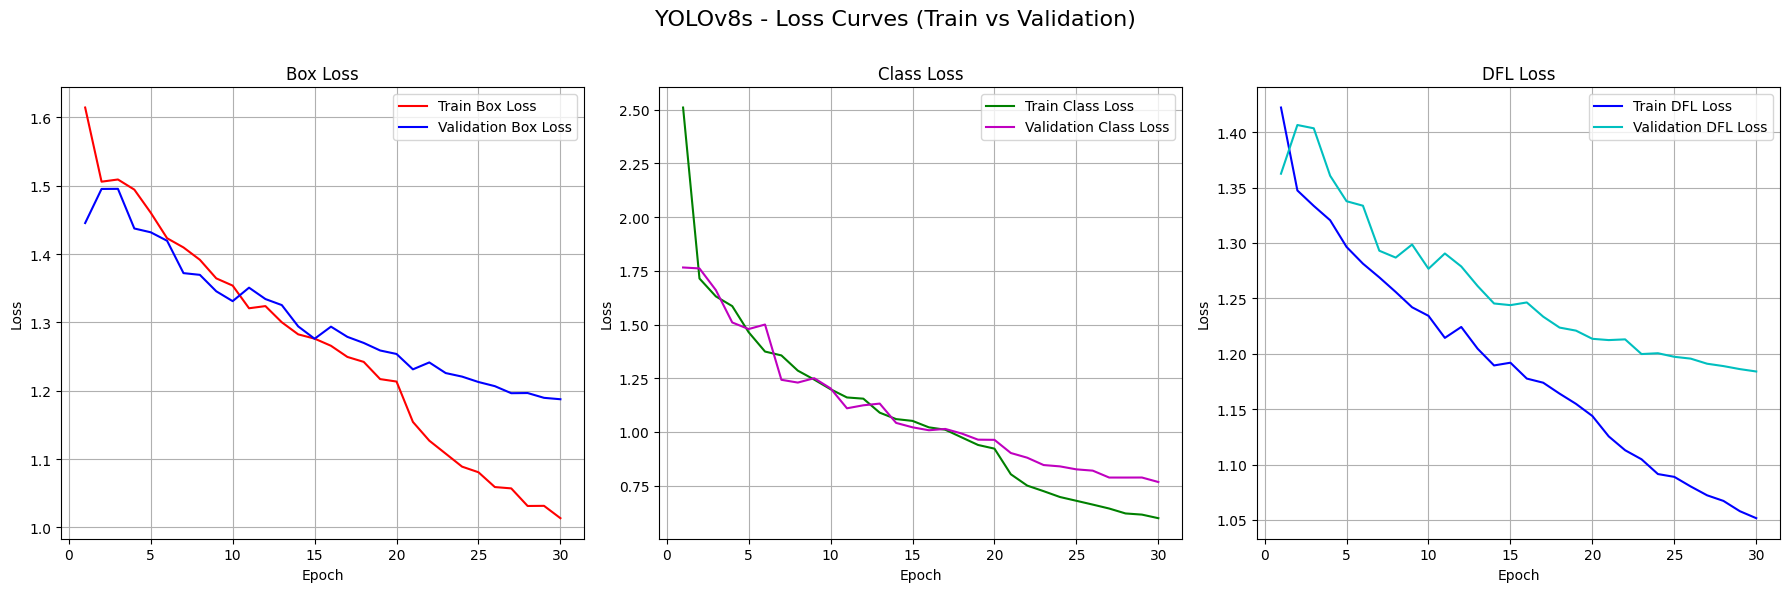

In [12]:
import matplotlib.pyplot as plt

# Assuming 'model_name' holds the name of your model
model_name = "YOLOv8s"

# Plot 1: Mixed Loss Curves (Training vs Validation)
fig1, axes1 = plt.subplots(1, 3, figsize=(18, 6))
fig1.suptitle(f"{model_name} - Loss Curves (Train vs Validation)", fontsize=16)

# Mixed Box Loss (Train vs Validation)
axes1[0].plot(results['epoch'], results['train/box_loss'], label='Train Box Loss', color='r')
axes1[0].plot(results['epoch'], results['val/box_loss'], label='Validation Box Loss', color='b')
axes1[0].set_title("Box Loss")
axes1[0].set_xlabel("Epoch")
axes1[0].set_ylabel("Loss")
axes1[0].legend()
axes1[0].grid(True)

# Mixed Class Loss (Train vs Validation)
axes1[1].plot(results['epoch'], results['train/cls_loss'], label='Train Class Loss', color='g')
axes1[1].plot(results['epoch'], results['val/cls_loss'], label='Validation Class Loss', color='m')
axes1[1].set_title("Class Loss")
axes1[1].set_xlabel("Epoch")
axes1[1].set_ylabel("Loss")
axes1[1].legend()
axes1[1].grid(True)

# Mixed DFL Loss (Train vs Validation)
axes1[2].plot(results['epoch'], results['train/dfl_loss'], label='Train DFL Loss', color='b')
axes1[2].plot(results['epoch'], results['val/dfl_loss'], label='Validation DFL Loss', color='c')
axes1[2].set_title("DFL Loss")
axes1[2].set_xlabel("Epoch")
axes1[2].set_ylabel("Loss")
axes1[2].legend()
axes1[2].grid(True)

# Adjust layout for better spacing
fig1.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

In [15]:
!yolo task=detect mode=train model=yolov9s.pt data=/kaggle/working/ocean_waste-1/data.yaml epochs=30 imgsz=224 plots=True

100%|███████████████████████████████████████| 14.7M/14.7M [00:00<00:00, 132MB/s]
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov9s.pt, data=/kaggle/working/ocean_waste-1/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False,

In [16]:
import pandas as pd

# Path to results.csv
results_path = "/kaggle/working/runs/detect/train/results.csv"

# Load results into a DataFrame
results = pd.read_csv(results_path)

# Display the metrics for the last epoch
print("Metrics from the final epoch:")
print(results.iloc[-1])  # Shows precision, recall, F1-score, mAP, etc.

Metrics from the final epoch:
epoch                    30.000000
time                    731.761000
train/box_loss            1.013540
train/cls_loss            0.598620
train/dfl_loss            1.051600
metrics/precision(B)      0.677170
metrics/recall(B)         0.663380
metrics/mAP50(B)          0.703840
metrics/mAP50-95(B)       0.468710
val/box_loss              1.187630
val/cls_loss              0.767050
val/dfl_loss              1.183990
lr/pg0                    0.000023
lr/pg1                    0.000023
lr/pg2                    0.000023
Name: 29, dtype: float64


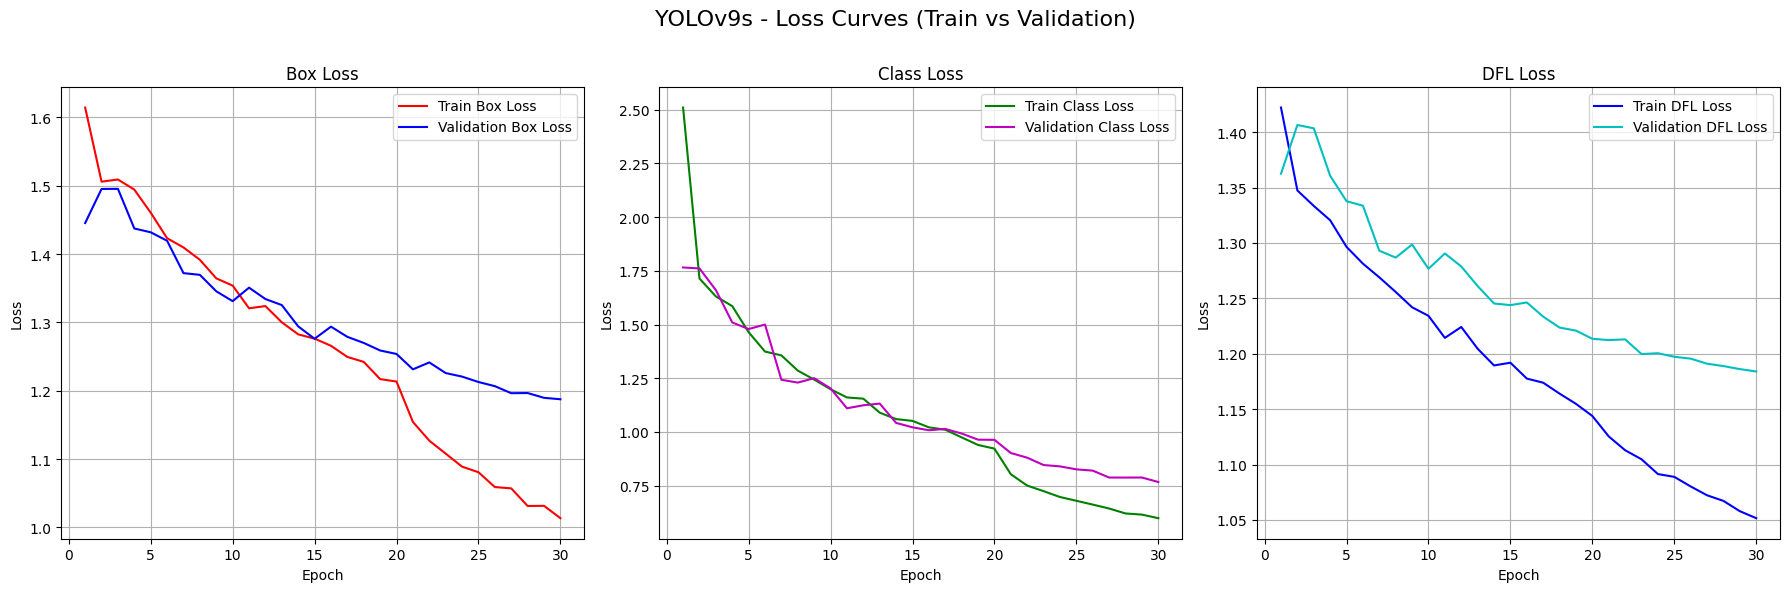

In [17]:
import matplotlib.pyplot as plt

# Assuming 'model_name' holds the name of your model
model_name = "YOLOv9s"

# Plot 1: Mixed Loss Curves (Training vs Validation)
fig1, axes1 = plt.subplots(1, 3, figsize=(18, 6))
fig1.suptitle(f"{model_name} - Loss Curves (Train vs Validation)", fontsize=16)

# Mixed Box Loss (Train vs Validation)
axes1[0].plot(results['epoch'], results['train/box_loss'], label='Train Box Loss', color='r')
axes1[0].plot(results['epoch'], results['val/box_loss'], label='Validation Box Loss', color='b')
axes1[0].set_title("Box Loss")
axes1[0].set_xlabel("Epoch")
axes1[0].set_ylabel("Loss")
axes1[0].legend()
axes1[0].grid(True)

# Mixed Class Loss (Train vs Validation)
axes1[1].plot(results['epoch'], results['train/cls_loss'], label='Train Class Loss', color='g')
axes1[1].plot(results['epoch'], results['val/cls_loss'], label='Validation Class Loss', color='m')
axes1[1].set_title("Class Loss")
axes1[1].set_xlabel("Epoch")
axes1[1].set_ylabel("Loss")
axes1[1].legend()
axes1[1].grid(True)

# Mixed DFL Loss (Train vs Validation)
axes1[2].plot(results['epoch'], results['train/dfl_loss'], label='Train DFL Loss', color='b')
axes1[2].plot(results['epoch'], results['val/dfl_loss'], label='Validation DFL Loss', color='c')
axes1[2].set_title("DFL Loss")
axes1[2].set_xlabel("Epoch")
axes1[2].set_ylabel("Loss")
axes1[2].legend()
axes1[2].grid(True)

# Adjust layout for better spacing
fig1.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()